In [12]:
import tushare as ts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [7]:
register_matplotlib_converters()
sns.set_style('darkgrid')
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

In [33]:
pro = ts.pro_api(token='*')
start_time = datetime.date.today() + datetime.timedelta(-365*0.6)
df = pro.daily(ts_code='002581.SZ', start_date=start_time.strftime("%Y%m%d"))
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,002581.SZ,20201021,23.33,25.33,22.08,22.52,23.45,-0.93,-3.9659,636139.90,1529210.565
1,002581.SZ,20201020,21.00,23.45,20.93,23.45,21.32,2.13,9.9906,544230.34,1222651.067
2,002581.SZ,20201019,20.36,21.88,19.88,21.32,20.00,1.32,6.6000,438082.48,915667.188
3,002581.SZ,20201016,19.80,20.16,19.00,20.00,19.65,0.35,1.7812,255767.00,503166.172
4,002581.SZ,20201015,18.54,20.21,18.09,19.65,19.00,0.65,3.4211,281420.99,542724.059
...,...,...,...,...,...,...,...,...,...,...,...
140,002581.SZ,20200323,13.20,13.63,12.83,13.21,12.68,0.53,4.1798,553142.51,733068.643
141,002581.SZ,20200320,12.74,14.12,12.51,12.68,13.90,-1.22,-8.7770,667692.82,869770.927
142,002581.SZ,20200319,15.28,15.28,13.90,13.90,15.44,-1.54,-9.9741,620578.46,886661.475
143,002581.SZ,20200318,15.40,15.44,14.58,15.44,14.04,1.40,9.9715,745276.83,1132273.046


In [34]:
df_data = df[['trade_date','open']]
# df_data = df_data.set_index('trade_date')
df_data = df_data.sort_values('trade_date')
df_data

,trade_date,open
144,20200317,13.19
143,20200318,15.40
142,20200319,15.28
141,20200320,12.74
140,20200323,13.20
...,...,...
4,20201015,18.54
3,20201016,19.80
2,20201019,20.36
1,20201020,21.00


In [35]:
# from statsmodels.tsa.seasonal import STL
# stl = STL(df_data, seasonal=13)
# res = stl.fit()
# fig = res.plot()

In [36]:
df_data.rename(columns={'trade_date': 'ds', 'open': 'y'}, inplace=True)
df_data

,ds,y
144,20200317,13.19
143,20200318,15.40
142,20200319,15.28
141,20200320,12.74
140,20200323,13.20
...,...,...
4,20201015,18.54
3,20201016,19.80
2,20201019,20.36
1,20201020,21.00


In [39]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(df_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [43]:
datetime.date.today().strftime("%Y%m%d")

'20201022'

In [45]:
(datetime.date.today()+datetime.timedelta(1)).strftime("%Y%m%d")

'20201023'

In [46]:
date_list = []
for i in range(5):
    date_list.append((datetime.date.today()+datetime.timedelta(i)).strftime("%Y%m%d"))
date_list

['20201022', '20201023', '20201024', '20201025', '20201026']

In [55]:
# future = prophet.make_future_dataframe(periods=365)
future = prophet.make_future_dataframe(periods=5)
future

# future = pd.DataFrame({'ds': date_list})
# future

,ds
0,2020-03-17
1,2020-03-18
2,2020-03-19
3,2020-03-20
4,2020-03-23
...,...
145,2020-10-22
146,2020-10-23
147,2020-10-24
148,2020-10-25


In [56]:
forecast = prophet.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-17,12.903578,9.234064,15.151819,12.903578,12.903578,-0.800237,-0.800237,-0.800237,-0.977392,-0.977392,-0.977392,0.177155,0.177155,0.177155,0.0,0.0,0.0,12.103341
1,2020-03-18,13.101599,9.171146,15.197618,13.101599,13.101599,-0.721552,-0.721552,-0.721552,-0.977392,-0.977392,-0.977392,0.255840,0.255840,0.255840,0.0,0.0,0.0,12.380047
2,2020-03-19,13.299620,9.373817,15.204732,13.299620,13.299620,-1.200486,-1.200486,-1.200486,-0.977392,-0.977392,-0.977392,-0.223094,-0.223094,-0.223094,0.0,0.0,0.0,12.099134
3,2020-03-20,13.497641,9.091084,15.111617,13.497641,13.497641,-1.324412,-1.324412,-1.324412,-0.977392,-0.977392,-0.977392,-0.347020,-0.347020,-0.347020,0.0,0.0,0.0,12.173229
4,2020-03-23,14.091705,9.836108,16.056964,14.091705,14.091705,-1.084620,-1.084620,-1.084620,-0.977392,-0.977392,-0.977392,-0.107228,-0.107228,-0.107228,0.0,0.0,0.0,13.007085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020-10-22,18.484871,14.180716,20.509693,18.484871,18.484871,-1.200486,-1.200486,-1.200486,-0.977392,-0.977392,-0.977392,-0.223094,-0.223094,-0.223094,0.0,0.0,0.0,17.284385
146,2020-10-23,18.410615,14.004354,19.985052,18.410453,18.410645,-1.324412,-1.324412,-1.324412,-0.977392,-0.977392,-0.977392,-0.347020,-0.347020,-0.347020,0.0,0.0,0.0,17.086203
147,2020-10-24,18.336360,14.345282,20.421423,18.331529,18.341800,-0.855218,-0.855218,-0.855218,-0.977392,-0.977392,-0.977392,0.122174,0.122174,0.122174,0.0,0.0,0.0,17.481142
148,2020-10-25,18.262104,14.577449,20.394849,18.249423,18.274926,-0.855218,-0.855218,-0.855218,-0.977392,-0.977392,-0.977392,0.122174,0.122174,0.122174,0.0,0.0,0.0,17.406886


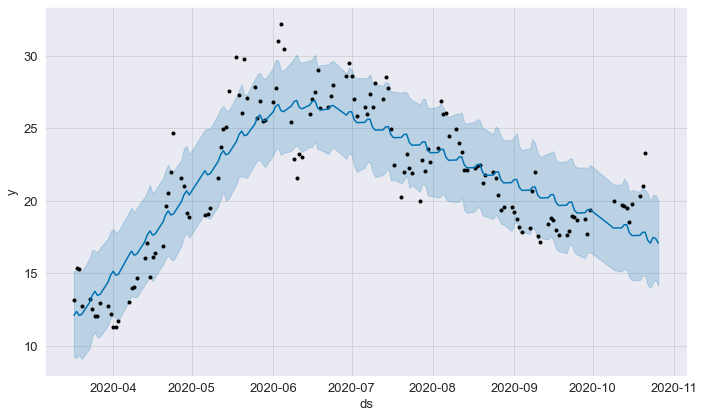

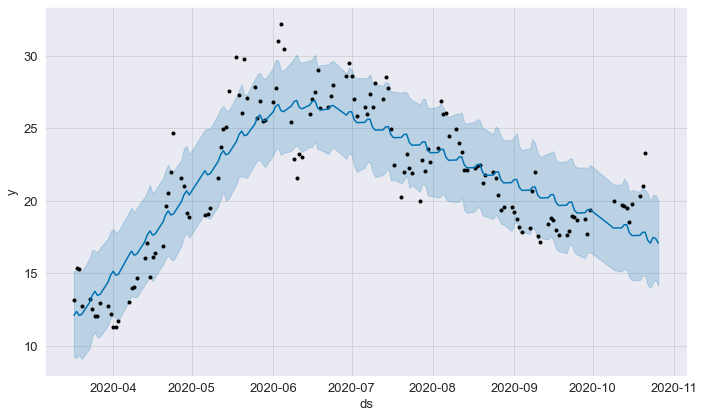

In [57]:
prophet.plot(forecast)